In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Display column names to verify correctness
print("Dataset Columns:", df.columns)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Convert categorical columns to lowercase for consistency
df.columns = df.columns.str.lower()

# Identify potential bias columns
bias_columns = ["gender", "Senior Citizen", "Partner", "Dependents", "Tenure", "Payment Method", "Monthly Charges"]
existing_bias_columns = [col for col in bias_columns if col in df.columns]
print("\nColumns that may introduce bias:", existing_bias_columns)

# Visualization - Gender Bias
if "Gender" in df.columns and "Churn" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="Gender", hue="Churn")
    plt.title("Churn by Gender")
    plt.show()

# Visualization - Senior Citizen Bias
if "Senior Citizen" in df.columns and "Churn" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="Senior Citizen", hue="Churn")
    plt.title("Churn by Senior Citizen Status")
    plt.show()

# Visualization - Payment Method Bias
if "Payment Method" in df.columns and "Churn" in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x="Payment Method", hue="Churn")
    plt.xticks(rotation=45)
    plt.title("Churn by Payment Method")
    plt.show()

# Customer Segmentation - Tenure Distribution
if "Tenure" in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df["Tenure"], bins=20, kde=True)
    plt.title("Customer Distribution by Tenure")
    plt.show()

# Customer Segmentation - Monthly Charges
if "Monthly Charges" in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df["Monthly Charges"], bins=20, kde=True)
    plt.title("Customer Distribution by Monthly Charges")
    plt.show()

# Customer Segmentation - Churn by Tenure
if "Tenure" in df.columns and "Churn" in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x="Churn", y="Tenure")
    plt.title("Churn Distribution by Tenure")
    plt.show()

# Group customers by demographics
demographic_groups = df.groupby(["Gender", "Senior Ccitizen", "Partner", "Dependents"]).size().reset_index(name='count')
print("\nDemographic Customer Groups:\n", demographic_groups.head())

# Visualization of Demographic Groups
plt.figure(figsize=(8, 4))
sns.barplot(data=demographic_groups, x="Gender", y="Count", hue="Senior Citizen")
plt.title("Customer Distribution by Gender and Senior Citizen Status")
plt.show()

# Group customers by geography (if available)
if "Geography" in df.columns:
    geo_groups = df.groupby("Geography").size().reset_index(name='count')
    plt.figure(figsize=(8, 4))
    sns.barplot(data=geo_groups, x="Geography", y="Count")
    plt.xticks(rotation=45)
    plt.title("Customer Distribution by Geography")
    plt.show()

# Group customers by usage behavior
if "Tenure" in df.columns and "Monthly Charges" in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x="Tenure", y="Monthly Charges", hue="Churn", alpha=0.7)
    plt.title("Customer Segmentation by Usage Behavior")
    plt.show()


Dataset Columns: Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn', 'Churn Category', 'Churn Reason', 'Churn Score', 'City',
       'CLTV', 'Contract', 'Country', 'Customer ID', 'Customer Status',
       'Dependents', 'Device Protection Plan', 'Gender', 'Internet Service',
       'Internet Type', 'Lat Long', 'Latitude', 'Longitude', 'Married',
       'Monthly Charge', 'Multiple Lines', 'Number of Dependents',
       'Number of Referrals', 'Offer', 'Online Backup', 'Online Security',
       'Paperless Billing', 'Partner', 'Payment Method', 'Phone Service',
       'Population', 'Premium Tech Support', 'Quarter', 'Referred a Friend',
       'Satisfaction Score', 'Senior Citizen', 'State', 'Streaming Movies',
       'Streaming Music', 'Streaming TV', 'Tenure in Months', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Refunds', 'Total Revenue', 'Under 30', 'Unlimited Data',
       'Zip Code'],
      

KeyError: 'Gender'

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Convert column names to lowercase for consistency
df.columns = df.columns.str.lower()

# Ensure 'seniorcitizen' exists in the dataset
if "seniorcitizen" not in df.columns:
    print("Warning: 'seniorcitizen' column not found in dataset. Skipping related analysis.")
else:
    # Convert SeniorCitizen to categorical if necessary
    df["seniorcitizen"] = df["seniorcitizen"].astype(str)

    # Grouping customers by demographics
    demographic_groups = df.groupby(["gender", "seniorcitizen", "partner", "dependents"]).size().reset_index(name='count')
    print("Demographic Customer Groups:")
    print(demographic_groups.head())

    # Visualizing demographic distribution
    plt.figure(figsize=(8, 4))
    sns.barplot(data=demographic_groups, x="gender", y="count", hue="seniorcitizen")
    plt.title("Customer Distribution by Gender and Senior Citizen Status")
    plt.show()

# Grouping customers by geography (if available)
if "geography" in df.columns:
    geo_groups = df.groupby("geography").size().reset_index(name='count')
    print("Geographic Customer Groups:")
    print(geo_groups.head())
    
    plt.figure(figsize=(8, 4))
    sns.barplot(data=geo_groups, x="geography", y="count")
    plt.xticks(rotation=45)
    plt.title("Customer Distribution by Geography")
    plt.show()

# Grouping customers by usage behavior
if "tenure" in df.columns and "monthlycharges" in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x="tenure", y="monthlycharges", hue="churn", alpha=0.7)
    plt.title("Customer Segmentation by Usage Behavior")
    plt.show()

    # Categorizing customers into low, mid, and high spenders
    df["spending_category"] = pd.qcut(df["monthlycharges"], q=3, labels=["Low", "Mid", "High"])
    spending_groups = df.groupby("spending_category").size().reset_index(name='count')
    print("Customer Groups by Spending Category:")
    print(spending_groups)
    
    plt.figure(figsize=(8, 4))
    sns.barplot(data=spending_groups, x="spending_category", y="count")
    plt.title("Customer Segmentation by Spending Category")
    plt.show()


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Convert column names to lowercase for consistency
df.columns = df.columns.str.lower()

# Print available columns
print("Dataset Columns: ", df.columns)

### ---- Demographic Segmentation ---- ###
# Check if required columns exist
demographic_columns = ["gender", "seniorcitizen", "partner", "dependents"]
missing_demo_cols = [col for col in demographic_columns if col not in df.columns]

if missing_demo_cols:
    print(f"Skipping demographic analysis. Missing columns: {missing_demo_cols}")
else:
    df["seniorcitizen"] = df["seniorcitizen"].astype(str)  # Convert to categorical
    demographic_groups = df.groupby(demographic_columns).size().reset_index(name='count')

    print("\nDemographic Customer Groups:\n", demographic_groups.head())

    # Plot demographic distribution
    plt.figure(figsize=(8, 4))
    sns.barplot(data=demographic_groups, x="gender", y="count", hue="seniorcitizen")
    plt.title("Customer Distribution by Gender and Senior Citizen Status")
    plt.show()

### ---- Geographic Segmentation ---- ###
geo_column = next((col for col in df.columns if "geo" in col.lower()), None)

if geo_column:
    geo_groups = df.groupby(geo_column).size().reset_index(name='count')
    print("\nGeographic Customer Groups:\n", geo_groups.head())

    plt.figure(figsize=(8, 4))
    sns.barplot(data=geo_groups, x=geo_column, y="count")
    plt.xticks(rotation=45)
    plt.title("Customer Distribution by Geography")
    plt.show()
else:
    print("Skipping geographic analysis. No geography-related column found.")

### ---- Usage Behavior Segmentation ---- ###
if "tenure" in df.columns and "monthlycharges" in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x="tenure", y="monthlycharges", hue="churn", alpha=0.7)
    plt.title("Customer Segmentation by Usage Behavior")
    plt.show()

    df["spending_category"] = pd.qcut(df["monthlycharges"], q=3, labels=["Low", "Mid", "High"])
    spending_groups = df.groupby("spending_category").size().reset_index(name='count')

    print("\nCustomer Groups by Spending Category:\n", spending_groups)

    plt.figure(figsize=(8, 4))
    sns.barplot(data=spending_groups, x="spending_category", y="count")
    plt.title("Customer Segmentation by Spending Category")
    plt.show()
else:
    print("Skipping usage behavior analysis. Missing 'tenure' or 'monthlycharges' columns.")


Dataset Columns:  Index(['age', 'avg monthly gb download', 'avg monthly long distance charges',
       'churn', 'churn category', 'churn reason', 'churn score', 'city',
       'cltv', 'contract', 'country', 'customer id', 'customer status',
       'dependents', 'device protection plan', 'gender', 'internet service',
       'internet type', 'lat long', 'latitude', 'longitude', 'married',
       'monthly charge', 'multiple lines', 'number of dependents',
       'number of referrals', 'offer', 'online backup', 'online security',
       'paperless billing', 'partner', 'payment method', 'phone service',
       'population', 'premium tech support', 'quarter', 'referred a friend',
       'satisfaction score', 'senior citizen', 'state', 'streaming movies',
       'streaming music', 'streaming tv', 'tenure in months', 'total charges',
       'total extra data charges', 'total long distance charges',
       'total refunds', 'total revenue', 'under 30', 'unlimited data',
       'zip code'],
     

Dataset Columns:  Index(['age', 'avg monthly gb download', 'avg monthly long distance charges',
       'churn', 'churn category', 'churn reason', 'churn score', 'city',
       'cltv', 'contract', 'country', 'customer id', 'customer status',
       'dependents', 'device protection plan', 'gender', 'internet service',
       'internet type', 'lat long', 'latitude', 'longitude', 'married',
       'monthly charge', 'multiple lines', 'number of dependents',
       'number of referrals', 'offer', 'online backup', 'online security',
       'paperless billing', 'partner', 'payment method', 'phone service',
       'population', 'premium tech support', 'quarter', 'referred a friend',
       'satisfaction score', 'senior citizen', 'state', 'streaming movies',
       'streaming music', 'streaming tv', 'tenure in months', 'total charges',
       'total extra data charges', 'total long distance charges',
       'total refunds', 'total revenue', 'under 30', 'unlimited data',
       'zip code'],
     

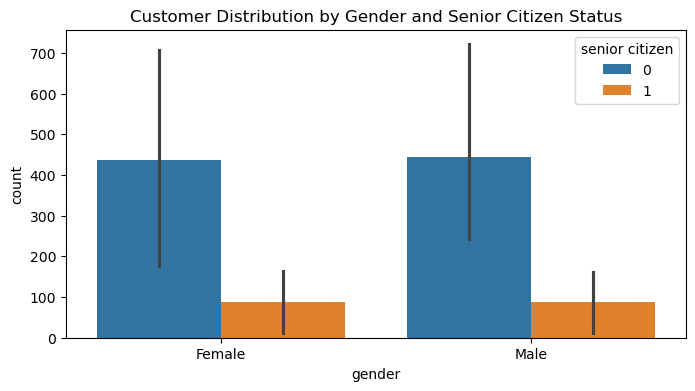


Geographic Customer Groups:
         state  count
0  California   4225


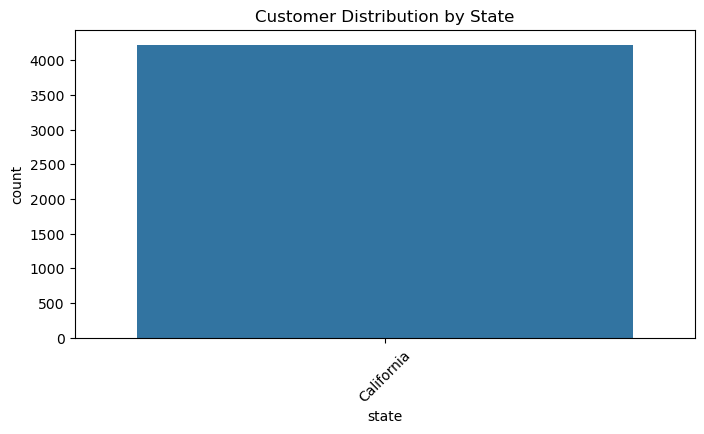

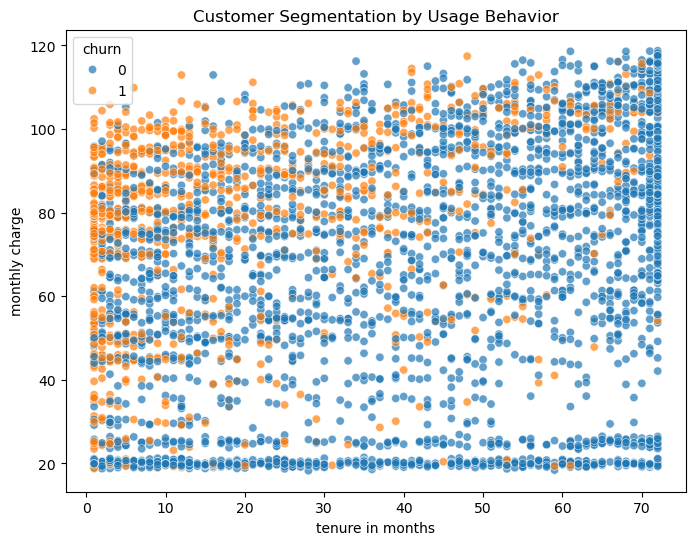


Customer Groups by Spending Category:
   spending_category  count
0               Low   1414
1               Mid   1404
2              High   1407


C:\Users\daksh\AppData\Local\Temp\ipykernel_18800\796151848.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_groups = df.groupby("spending_category").size().reset_index(name='count')


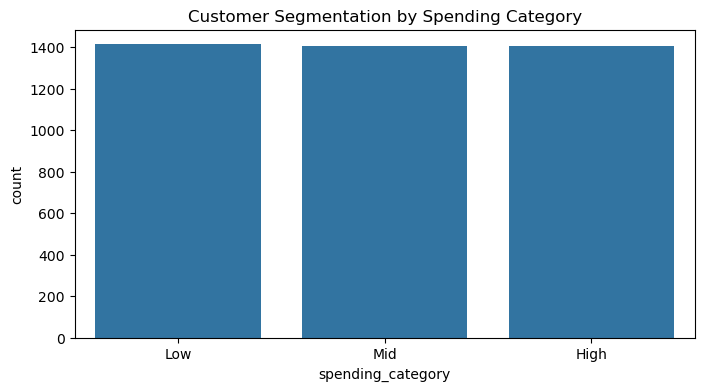

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Convert column names to lowercase for consistency
df.columns = df.columns.str.lower()

# Print available columns
print("Dataset Columns: ", df.columns)

### ---- Demographic Segmentation ---- ###
demographic_columns = ["gender", "senior citizen", "partner", "dependents"]
missing_demo_cols = [col for col in demographic_columns if col not in df.columns]

if missing_demo_cols:
    print(f"Skipping demographic analysis. Missing columns: {missing_demo_cols}")
else:
    df["senior citizen"] = df["senior citizen"].astype(str)  # Convert to categorical
    demographic_groups = df.groupby(demographic_columns).size().reset_index(name='count')

    print("\nDemographic Customer Groups:\n", demographic_groups.head())

    # Plot demographic distribution
    plt.figure(figsize=(8, 4))
    sns.barplot(data=demographic_groups, x="gender", y="count", hue="senior citizen")
    plt.title("Customer Distribution by Gender and Senior Citizen Status")
    plt.show()

### ---- Geographic Segmentation ---- ###
geo_column = "state" if "state" in df.columns else "city" if "city" in df.columns else None

if geo_column:
    geo_groups = df.groupby(geo_column).size().reset_index(name='count')
    print("\nGeographic Customer Groups:\n", geo_groups.head())

    plt.figure(figsize=(8, 4))
    sns.barplot(data=geo_groups, x=geo_column, y="count")
    plt.xticks(rotation=45)
    plt.title(f"Customer Distribution by {geo_column.capitalize()}")
    plt.show()
else:
    print("Skipping geographic analysis. No 'state' or 'city' column found.")

### ---- Usage Behavior Segmentation ---- ###
if "tenure in months" in df.columns and "monthly charge" in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x="tenure in months", y="monthly charge", hue="churn", alpha=0.7)
    plt.title("Customer Segmentation by Usage Behavior")
    plt.show()

    df["spending_category"] = pd.qcut(df["monthly charge"], q=3, labels=["Low", "Mid", "High"])
    spending_groups = df.groupby("spending_category").size().reset_index(name='count')

    print("\nCustomer Groups by Spending Category:\n", spending_groups)

    plt.figure(figsize=(8, 4))
    sns.barplot(data=spending_groups, x="spending_category", y="count")
    plt.title("Customer Segmentation by Spending Category")
    plt.show()
else:
    print("Skipping usage behavior analysis. Missing 'tenure in months' or 'monthly charge' columns.")


 Available Columns:  Index(['age', 'avg monthly gb download', 'avg monthly long distance charges',
       'churn', 'churn category', 'churn reason', 'churn score', 'city',
       'cltv', 'contract', 'country', 'customer id', 'customer status',
       'dependents', 'device protection plan', 'gender', 'internet service',
       'internet type', 'lat long', 'latitude', 'longitude', 'married',
       'monthly charge', 'multiple lines', 'number of dependents',
       'number of referrals', 'offer', 'online backup', 'online security',
       'paperless billing', 'partner', 'payment method', 'phone service',
       'population', 'premium tech support', 'quarter', 'referred a friend',
       'satisfaction score', 'senior citizen', 'state', 'streaming movies',
       'streaming music', 'streaming tv', 'tenure in months', 'total charges',
       'total extra data charges', 'total long distance charges',
       'total refunds', 'total revenue', 'under 30', 'unlimited data',
       'zip code'],
  

C:\Users\daksh\AppData\Local\Temp\ipykernel_5020\1264558647.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


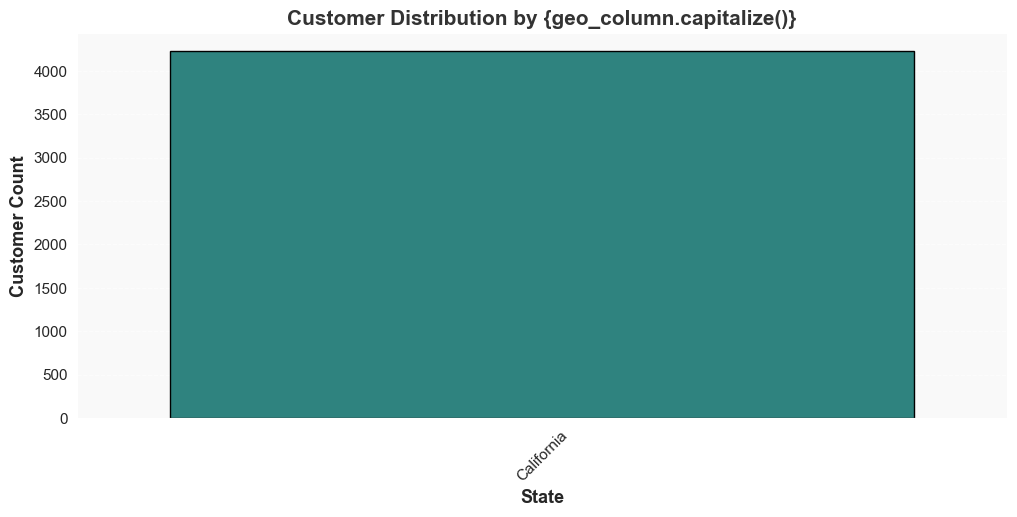

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


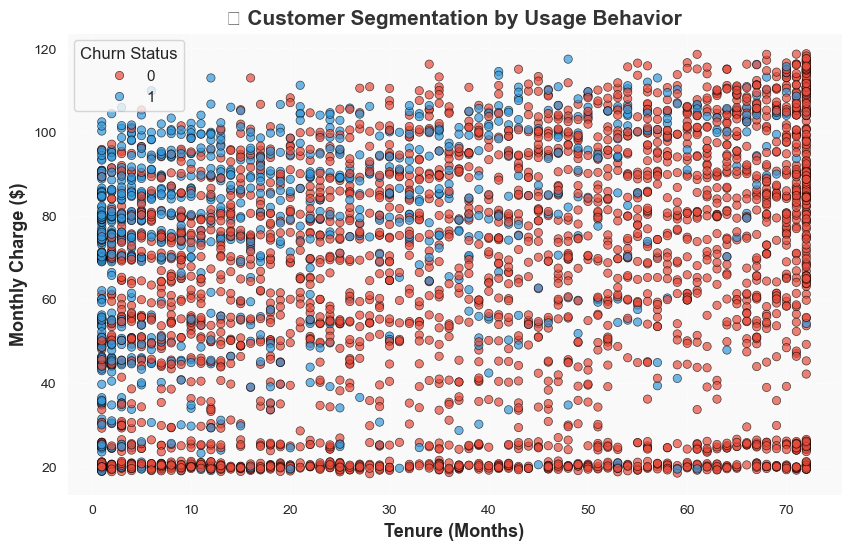

C:\Users\daksh\AppData\Local\Temp\ipykernel_5020\1264558647.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_groups = df.groupby("spending_category").size().reset_index(name="count")
C:\Users\daksh\AppData\Local\Temp\ipykernel_5020\1264558647.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(



 Customer Groups by Spending Category:
   spending_category  count
0               Low   1414
1               Mid   1404
2              High   1407


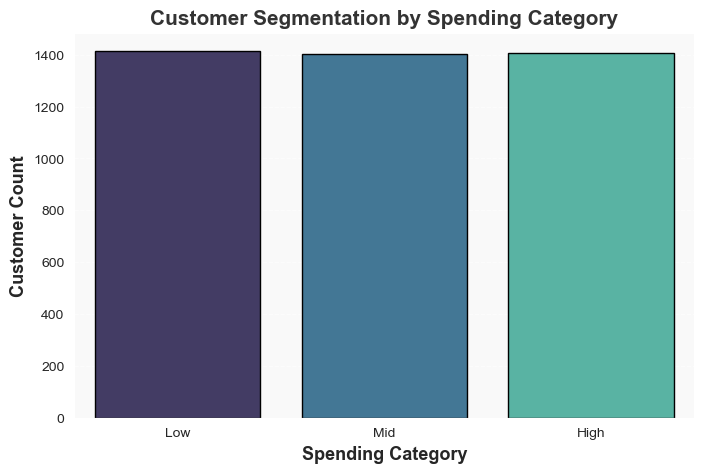


 Demographic Customer Groups:
    gender senior citizen  partner  dependents  count
0  Female              0        0           0    815
1  Female              0        0           1     75
2  Female              0        1           0    482
3  Female              0        1           1    380
4  Female              1        0           0    197


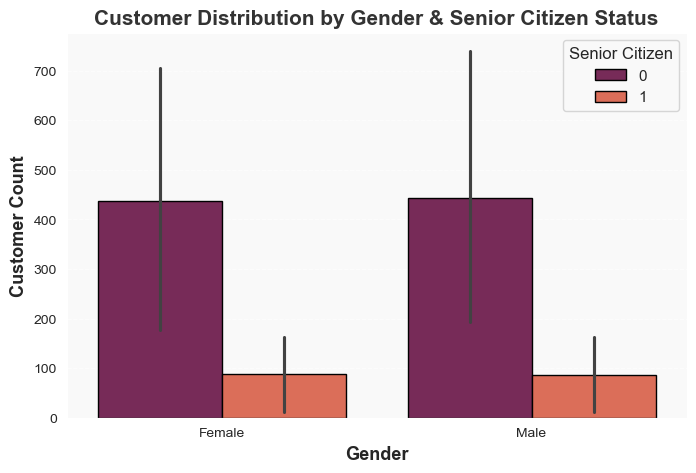

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = "Telco-Customer-Churn.csv"  # Replace with actual file path
df = pd.read_csv(file_path)
df.columns = df.columns.str.lower()
sns.set_style("darkgrid")
plt.rcParams.update({"axes.facecolor": "#f9f9f9"})  # Light background for contrast
print(" Available Columns: ", df.columns)
geo_column = "state" if "state" in df.columns else "city" if "city" in df.columns else None

if geo_column:
    # Group customers by geographic location
    geo_groups = df.groupby(geo_column).size().reset_index(name="count")
    print("\n Geographic Customer Groups:\n", geo_groups.head())
    plt.figure(figsize=(12, 5))
    sns.barplot(
        data=geo_groups, 
        x=geo_column, 
        y="count", 
        palette="viridis",  # Vibrant color palette
        edgecolor="black"  # Edge color for better definition
    )
    plt.xticks(rotation=45, fontsize=11)
    plt.yticks(fontsize=11)
    plt.xlabel(geo_column.capitalize(), fontsize=13, fontweight="bold")
    plt.ylabel("Customer Count", fontsize=13, fontweight="bold")
    plt.title("Customer Distribution by {geo_column.capitalize()}", fontsize=15, fontweight="bold", color="#333")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()
else:
    print("Skipping geographic analysis. No 'state' or 'city' column found.")
if {"tenure in months", "monthly charge", "churn"}.issubset(df.columns):
    # Scatter plot: tenure vs. monthly charge, colored by churn status
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df, 
        x="tenure in months", 
        y="monthly charge", 
        hue="churn", 
        palette=["#e74c3c", "#3498db"],  
        alpha=0.7, 
        edgecolor="black"  # Enhance bubbles
    )
    plt.xlabel("Tenure (Months)", fontsize=13, fontweight="bold")
    plt.ylabel("Monthly Charge ($)", fontsize=13, fontweight="bold")
    plt.title("📈 Customer Segmentation by Usage Behavior", fontsize=15, fontweight="bold", color="#333")
    plt.legend(title="Churn Status", title_fontsize="12", fontsize="11", loc="upper left")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()
    df["spending_category"] = pd.qcut(df["monthly charge"], q=3, labels=["Low", "Mid", "High"])
    spending_groups = df.groupby("spending_category").size().reset_index(name="count")

    print("\n Customer Groups by Spending Category:\n", spending_groups)
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=spending_groups, 
        x="spending_category", 
        y="count", 
        palette="mako",  # Elegant gradient palette
        edgecolor="black"
    )
    plt.xlabel("Spending Category", fontsize=13, fontweight="bold")
    plt.ylabel("Customer Count", fontsize=13, fontweight="bold")
    plt.title("Customer Segmentation by Spending Category", fontsize=15, fontweight="bold", color="#333")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()
else:
    print("Skipping usage behavior analysis. Missing required columns.")
demographic_columns = ["gender", "senior citizen", "partner", "dependents"]
missing_demo_cols = [col for col in demographic_columns if col not in df.columns]

if not missing_demo_cols:
    df["senior citizen"] = df["senior citizen"].astype(str)
    demographic_groups = df.groupby(demographic_columns).size().reset_index(name="count")
    print("\n Demographic Customer Groups:\n", demographic_groups.head())
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=demographic_groups, 
        x="gender", 
        y="count", 
        hue="senior citizen", 
        palette="rocket", 
        edgecolor="black"
    )
    plt.xlabel("Gender", fontsize=13, fontweight="bold")
    plt.ylabel("Customer Count", fontsize=13, fontweight="bold")
    plt.title("Customer Distribution by Gender & Senior Citizen Status", fontsize=15, fontweight="bold", color="#333")
    plt.legend(title="Senior Citizen", title_fontsize="12", fontsize="11", loc="upper right")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()
else:
    print(" Skipping demographic analysis. Missing columns: {missing_demo_cols}")


 Available Columns:
 Index(['age', 'avg monthly gb download', 'avg monthly long distance charges',
       'churn', 'churn category', 'churn reason', 'churn score', 'city',
       'cltv', 'contract', 'country', 'customer id', 'customer status',
       'dependents', 'device protection plan', 'gender', 'internet service',
       'internet type', 'lat long', 'latitude', 'longitude', 'married',
       'monthly charge', 'multiple lines', 'number of dependents',
       'number of referrals', 'offer', 'online backup', 'online security',
       'paperless billing', 'partner', 'payment method', 'phone service',
       'population', 'premium tech support', 'quarter', 'referred a friend',
       'satisfaction score', 'senior citizen', 'state', 'streaming movies',
       'streaming music', 'streaming tv', 'tenure in months', 'total charges',
       'total extra data charges', 'total long distance charges',
       'total refunds', 'total revenue', 'under 30', 'unlimited data',
       'zip code'],
  

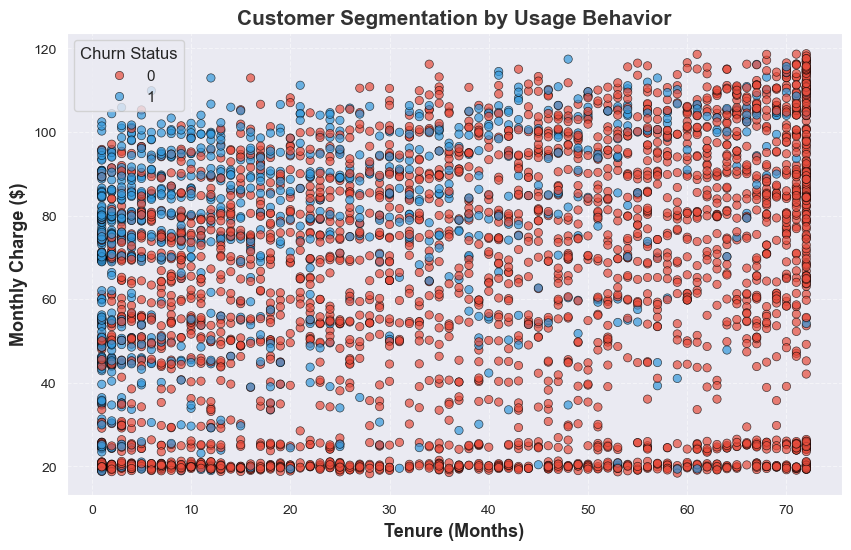

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = "Telco-Customer-Churn.csv"  # Replace with actual file path
df = pd.read_csv(file_path)
df.columns = df.columns.str.lower()
print(" Available Columns:\n", df.columns)
if "tenure in months" in df.columns:
    df.rename(columns={"tenure in months": "tenure"}, inplace=True)
sns.set_style("darkgrid")
if {"tenure", "monthly charge", "churn"}.issubset(df.columns):
    # Scatter plot: tenure vs. monthly charge, colored by churn status
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df, 
        x="tenure",  
        y="monthly charge", 
        hue="churn", 
        palette=["#e74c3c", "#3498db"],  # Red for churn, blue for non-churn
        alpha=0.7, 
        edgecolor="black"
    )
    plt.xlabel("Tenure (Months)", fontsize=13, fontweight="bold")
    plt.ylabel("Monthly Charge ($)", fontsize=13, fontweight="bold")
    plt.title("Customer Segmentation by Usage Behavior", fontsize=15, fontweight="bold", color="#333")
    plt.legend(title="Churn Status", title_fontsize="12", fontsize="11", loc="upper left")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()
else:
    print("Skipping usage behavior analysis. Missing required columns.")
